## Define Model

In [ ]:
from screenai.main import ScreenAI

# # Create a tensor for the image
# image = torch.rand(1, 3, 224, 224)

# # Create a tensor for the text
# # text = torch.randn(1, 1, 512)
# text = torch.randint(0, 20000, (1, 1028), dtype=torch.long)  # Ensure dtype is long


# Create an instance of the ScreenAI model with specified parameters
model = ScreenAI(
    num_tokens = 20000,
    max_seq_len = 1028,
    patch_size=16,
    image_size=224,
    dim=512,
    depth=6,
    heads=8,
    vit_depth=4,
    multi_modal_encoder_depth=4,
    llm_decoder_depth=4,
    mm_encoder_ff_mult=4,
)

## Define and form inputs

In [ ]:
from transformers import AutoTokenizer
from torchvision import transforms
from PIL import Image

# Step 1: Tokenize the text properly
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
prompt = "What is shown in this image?"

tokens = tokenizer(prompt, return_tensors="pt", padding="max_length", max_length=1028, truncation=True)

# ✅ Extract the input tensor (this was missing before!)
text_tensor = tokens["input_ids"]  # Shape: (1, 1028), dtype=torch.long

# Step 2: Process the Image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image
    transforms.ToTensor(),          # Convert to PyTorch tensor (C, H, W)
])

# Load an actual image
image_path = "images/apple.png"  # Replace with your actual image path
image = Image.open(image_path).convert("RGB")

# Apply transformations
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)

# Debug: Print shapes
print(f"Image Tensor Shape: {image_tensor.shape}")  # Expected: (1, 3, 224, 224)
print(f"Text Tensor Shape: {text_tensor.shape}")  # Expected: (1, 1028)

# Now pass both to the model
out = model(text_tensor, image_tensor)
print(out.shape)


Image Tensor Shape: torch.Size([1, 3, 224, 224])
Text Tensor Shape: torch.Size([1, 1028])
Image shape: torch.Size([1, 196, 512])
torch.Size([1, 1224, 512])
torch.Size([1, 1224, 512])


In [50]:
import torch.nn.functional as F

# Apply softmax to get probabilities
probabilities = F.softmax(out, dim=-1)

# Select the most probable token at each position

output_ids = torch.argmax(out, dim=-1)  # Extract token IDs
decoded_text = tokenizer.decode(output_ids[0].tolist(), skip_special_tokens=True)

print("Generated Text:", decoded_text)


Generated Text: [unused102] [unused163] [unused299] [unused299] [unused165] [unused415] [unused300] [unused196] [unused276] [unused106] [unused476] [unused206] [unused331] [unused432] [unused361] [unused498] [unused39] [unused107] [unused407] [unused158] [unused476] [unused386] [unused227] [unused254] [unused346] [unused493] [unused488] [unused300] [unused364] [unused362] [unused214] [unused187] [unused300] [unused206] [unused26] [unused246] [unused227] [unused418] [unused410] [unused363] [unused363] [unused439] [unused236] [unused476] [unused325] [unused255] [unused255] [unused255] [unused331] [unused106] [unused106] [unused25] [unused198] [unused256] [unused255] [unused432] [unused300] [unused313] [unused286] [unused246] [unused274] [unused246] [unused246] [unused476] [unused386] [unused437] [unused418] [unused274] [unused377] [unused500] [unused283] [unused157] [unused418] [unused386] [unused418] [unused269] [unused418] [unused246] [unused490] [unused233] [unused147] [unused418] [un

In [51]:
print(tokenizer.convert_ids_to_tokens(output_ids[0][:50].tolist()))


['[unused102]', '[unused163]', '[unused299]', '[unused299]', '[unused165]', '[unused415]', '[unused300]', '[unused196]', '[unused276]', '[unused106]', '[unused476]', '[unused206]', '[unused331]', '[unused432]', '[unused361]', '[unused498]', '[unused39]', '[unused107]', '[unused407]', '[unused158]', '[unused476]', '[unused386]', '[unused227]', '[unused254]', '[unused346]', '[unused493]', '[unused488]', '[unused300]', '[unused364]', '[unused362]', '[unused214]', '[unused187]', '[unused300]', '[unused206]', '[unused26]', '[unused246]', '[unused227]', '[unused418]', '[unused410]', '[unused363]', '[unused363]', '[unused439]', '[unused236]', '[unused476]', '[unused325]', '[unused255]', '[unused255]', '[unused255]', '[unused331]', '[unused106]']


Tensor min: 0.04313725605607033, max: 1.0


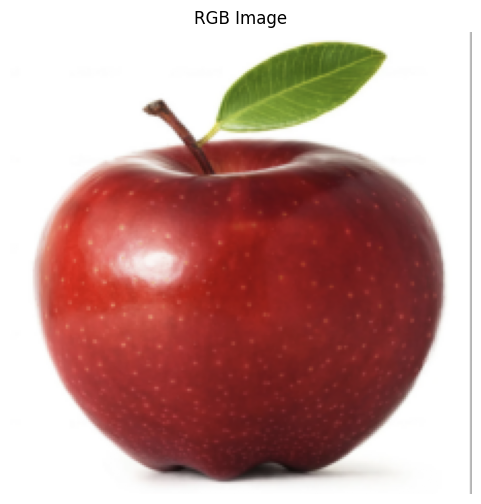

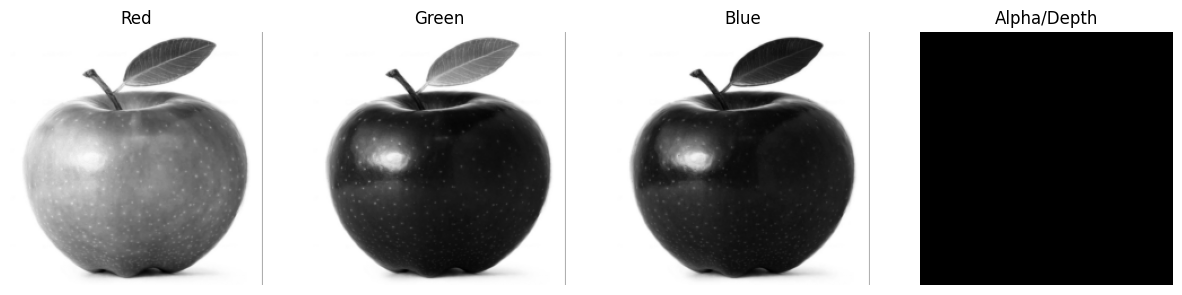

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assume this is your tensor of shape [1, 4, 224, 224]
tensor_image = inputs['pixel_values']  # Replace with your actual tensor

# Remove batch dimension (B, C, H, W) -> (C, H, W)
image = tensor_image.squeeze(0)  

# Check min/max values to detect normalization
print(f"Tensor min: {image.min()}, max: {image.max()}")

# Normalize to [0, 1] if needed
if image.min() < 0 or image.max() > 1:  # Tensor may be normalized to [-1,1] range
    print("Detected range outside [0,1], normalizing...")
    image = (image - image.min()) / (image.max() - image.min())

# Option 1: Display first 3 channels as an RGB image
if image.shape[0] == 4:
    rgb_image = image[:3]  # Take only R, G, B channels

    # Convert (C, H, W) -> (H, W, C) for matplotlib
    rgb_image = rgb_image.permute(1, 2, 0).numpy()

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("RGB Image")
    plt.show()

# Option 2: Show all 4 channels separately
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
channel_names = ['Red', 'Green', 'Blue', 'Alpha/Depth']

for i in range(4):
    ax = axes[i]
    ax.imshow(image[i].numpy(), cmap="gray")  # Show each channel in grayscale
    ax.set_title(channel_names[i])
    ax.axis("off")

plt.show()



Tensor min: 0.04313725605607033, max: 1.0


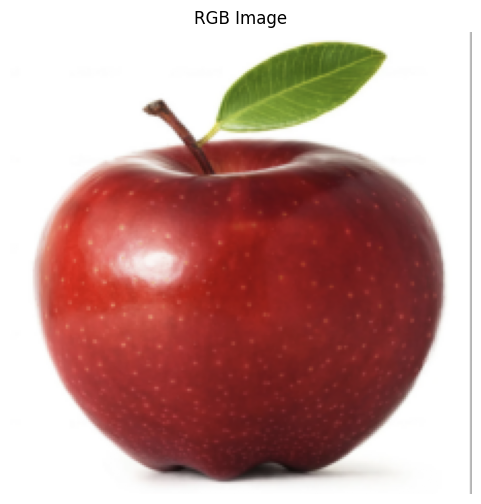

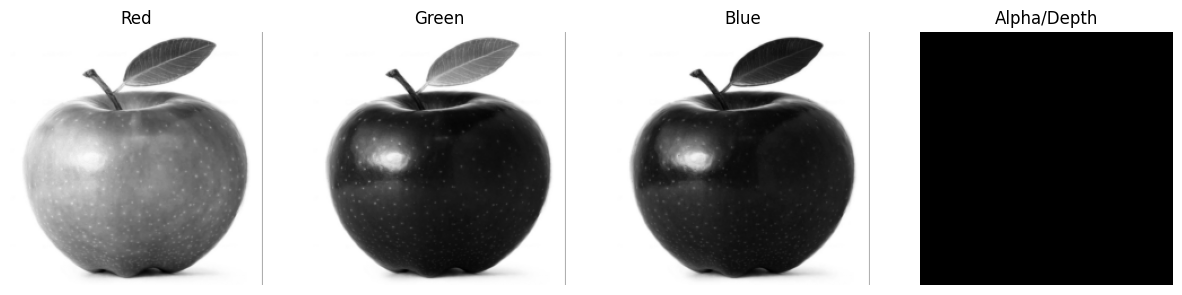

In [20]:
import torch
import matplotlib.pyplot as plt

# Assume this is your tensor of shape [1, 4, 224, 224]
tensor_image = inputs['pixel_values']  # Replace with your actual tensor

# Remove batch dimension (B, C, H, W) -> (C, H, W)
image = tensor_image.squeeze(0)  

# Check min/max values to detect normalization
print(f"Tensor min: {image.min()}, max: {image.max()}")

# Normalize to [0, 1] if needed
if image.min() < 0 or image.max() > 1:  # Tensor may be normalized to [-1,1] range
    print("Detected range outside [0,1], normalizing...")
    image = (image - image.min()) / (image.max() - image.min())

# Option 1: Display first 3 channels as an RGB image
if image.shape[0] == 4:
    rgb_image = image[:3]  # Take only R, G, B channels

    # Convert (C, H, W) -> (H, W, C) for matplotlib
    rgb_image = rgb_image.permute(1, 2, 0).numpy()

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("RGB Image")
    plt.show()

# Option 2: Show all 4 channels separately
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
channel_names = ['Red', 'Green', 'Blue', 'Alpha/Depth']

for i in range(4):
    ax = axes[i]
    ax.imshow(image[i].numpy(), cmap="gray")  # Show each channel in grayscale
    ax.set_title(channel_names[i])
    ax.axis("off")

plt.show()

